<a href="https://colab.research.google.com/github/suchismita-shaw/my_new_Repository/blob/main/WORK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import files
uploaded = files.upload()


Saving GSM2817841_alpha7G_Control_Male_RawCDScounts.txt to GSM2817841_alpha7G_Control_Male_RawCDScounts.txt
Saving GSM2817842_alpha7G_Smoked_Male_RawCDScounts.txt to GSM2817842_alpha7G_Smoked_Male_RawCDScounts.txt
Saving GSM2817843_alpha7E260A_Control_Male_RawCDScounts.txt to GSM2817843_alpha7E260A_Control_Male_RawCDScounts.txt
Saving GSM2817844_alpha7E260A_Smoked_Male_RawCDScounts.txt to GSM2817844_alpha7E260A_Smoked_Male_RawCDScounts.txt
Saving GSM2817845_alpha7_Control_Female_RawCDScounts.txt to GSM2817845_alpha7_Control_Female_RawCDScounts.txt
Saving GSM2817846_alpha7_Smoked_Female_RawCDScounts.txt to GSM2817846_alpha7_Smoked_Female_RawCDScounts.txt
Saving GSM2817847_alpha7E260A_Control_Female_RawCDScounts.txt to GSM2817847_alpha7E260A_Control_Female_RawCDScounts.txt
Saving GSM2817848_alpha7E260A_Smoked_Female_RawCDScounts.txt to GSM2817848_alpha7E260A_Smoked_Female_RawCDScounts.txt


In [8]:
import pandas as pd

# Step 1: List all uploaded file names (from previous upload)
uploaded_files = list(uploaded.keys())

# Step 2: Sort files for consistent order (optional)
uploaded_files.sort()

# Step 3: Initialize merged DataFrame
merged_df = None

# Step 4: Loop through each file
for file_name in uploaded_files:
    df = pd.read_csv(file_name, sep='\t', header=0)

    # Clean the column names
    gene_col = df.columns[0]  # should be 'GeneSymbol_EnsemblGeneID'
    sample_col = df.columns[1]  # e.g., 'alpha7G_Control_Male'

    df = df.rename(columns={gene_col: 'GeneSymbol_EnsemblGeneID', sample_col: sample_col})

    # Merge into main DataFrame
    if merged_df is None:
        merged_df = df
    else:
        merged_df = pd.merge(merged_df, df, on='GeneSymbol_EnsemblGeneID', how='outer')

# Step 5: Save merged CSV
merged_filename = 'merged_expression_data.csv'
merged_df.to_csv(merged_filename, index=False)

print(f'✅ Merged file saved as: {merged_filename}')


✅ Merged file saved as: merged_expression_data.csv


In [9]:
from google.colab import files
files.download('merged_expression_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
import pandas as pd

# Load merged data (if not already in memory)
merged_df = pd.read_csv("/content/merged_expression_data.csv")

# Show first few rows
merged_df.head()


,GeneSymbol_EnsemblGeneID,alpha7G_Control_Male,alpha7G_Smoked_Male,alpha7E260A:G_Control_Male,alpha7E260A:G_Smoked_Male,alpha7G_C_Female,alpha7G_Smoked_Female,alpha7E260A:G_C_Female,alpha7E260A:G_Smoked_Female
0,0610007C21Rik_ENSMUSG00000013622.8,513,1009,493,623,649,911,1229,1081
1,0610007L01Rik_ENSMUSG00000053094.8,399,380,340,325,450,349,428,349
2,0610007P08Rik_ENSMUSG00000021470.10,506,332,358,451,527,298,324,311
3,0610007P14Rik_ENSMUSG00000021252.5,200,326,163,146,248,281,264,269
4,0610007P22Rik_ENSMUSG00000015126.8,162,206,114,132,203,212,236,191


# Line Plot – Gene Expression Across Conditions

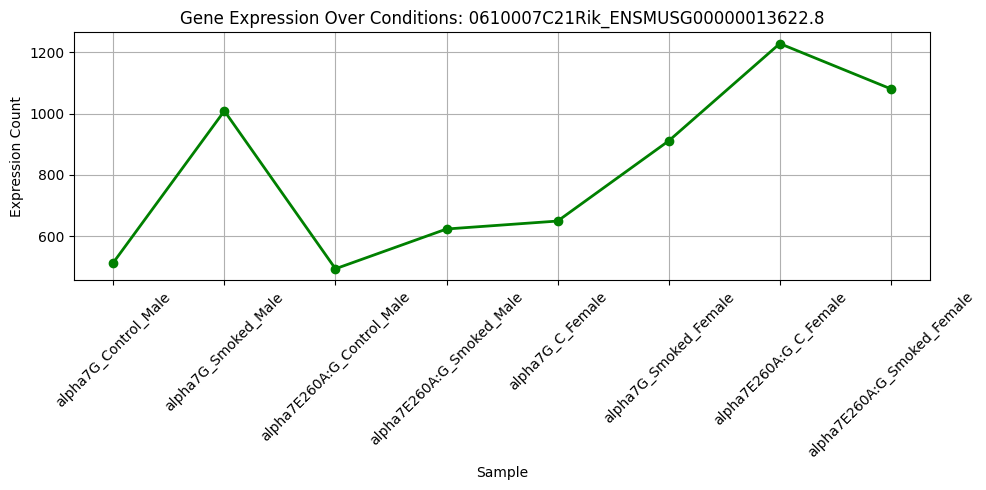

In [12]:
import matplotlib.pyplot as plt

# Choose a gene by ID
gene_id = '0610007C21Rik_ENSMUSG00000013622.8'

# Extract expression for that gene
gene_row = merged_df[merged_df['GeneSymbol_EnsemblGeneID'] == gene_id].iloc[0, 1:]

# Plot
plt.figure(figsize=(10, 5))
plt.plot(gene_row.index, gene_row.values, marker='o', color='green', linewidth=2)
plt.title(f'Gene Expression Over Conditions: {gene_id}')
plt.xlabel('Sample')
plt.ylabel('Expression Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
# Calculate mean expression across all conditions (skip first column)
merged_df['mean_expr'] = merged_df.iloc[:, 1:].mean(axis=1)

# Get top 5 genes by mean expression
top5_genes_df = merged_df.nlargest(5, 'mean_expr')

# Print gene IDs
print("Top 5 Genes:\n", top5_genes_df['GeneSymbol_EnsemblGeneID'].tolist())


Top 5 Genes:
 ['Scgb1a1_ENSMUSG00000024653.2', 'Chi3l3_ENSMUSG00000040809.9', 'Lyz2_ENSMUSG00000069516.6', 'mt-Co1_ENSMUSG00000064351.1', 'Sftpc_ENSMUSG00000022097.3']


In [14]:
# Only expression values (skip 'mean_expr' column)
top5_expression = top5_genes_df.drop(columns='mean_expr').set_index('GeneSymbol_EnsemblGeneID')


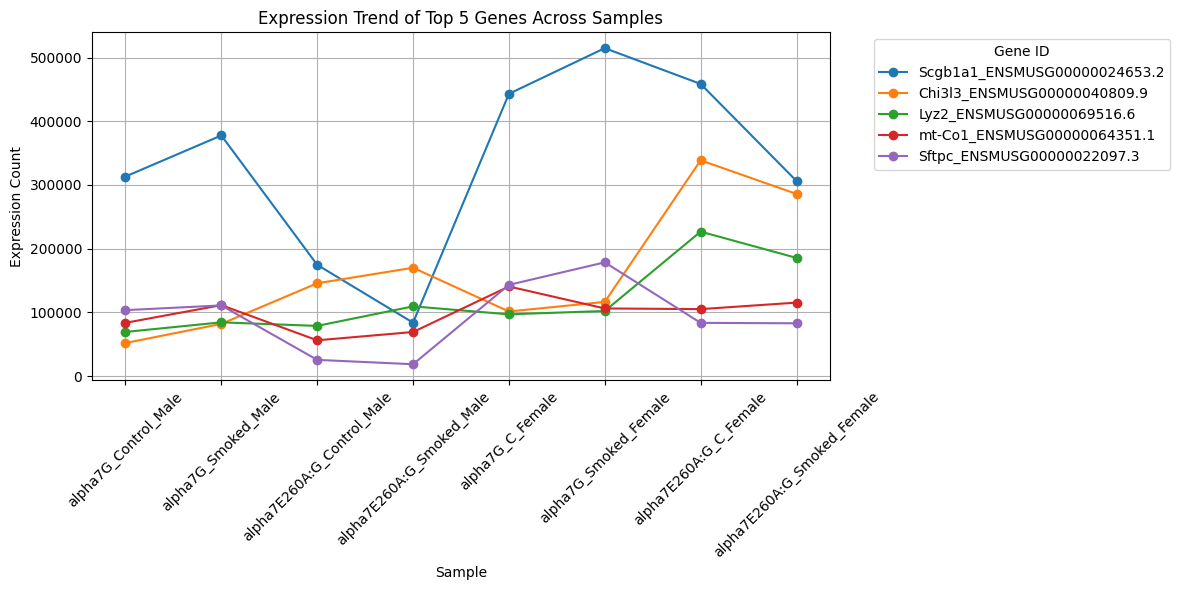

In [15]:
import matplotlib.pyplot as plt

# Transpose for plotting (samples on x-axis, genes as lines)
top5_expression_T = top5_expression.T

# Plot
plt.figure(figsize=(12, 6))
for gene in top5_expression_T.columns:
    plt.plot(top5_expression_T.index, top5_expression_T[gene], marker='o', label=gene)

plt.title('Expression Trend of Top 5 Genes Across Samples')
plt.xlabel('Sample')
plt.ylabel('Expression Count')
plt.xticks(rotation=45)
plt.legend(title='Gene ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


# Bar Plot – Average Expression for a Few Genes

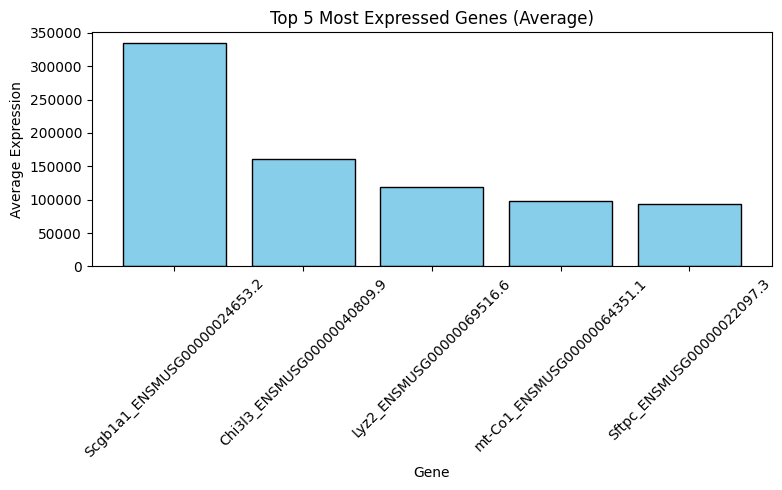

In [16]:
# Pick top 5 highly expressed genes (by mean)
merged_df['mean_expr'] = merged_df.iloc[:, 1:].mean(axis=1)
top_genes = merged_df.nlargest(5, 'mean_expr')

# Bar plot: gene name vs average expression
plt.figure(figsize=(8, 5))
plt.bar(top_genes['GeneSymbol_EnsemblGeneID'], top_genes['mean_expr'], color='skyblue', edgecolor='black')
plt.title('Top 5 Most Expressed Genes (Average)')
plt.xlabel('Gene')
plt.ylabel('Average Expression')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Scatter Plot

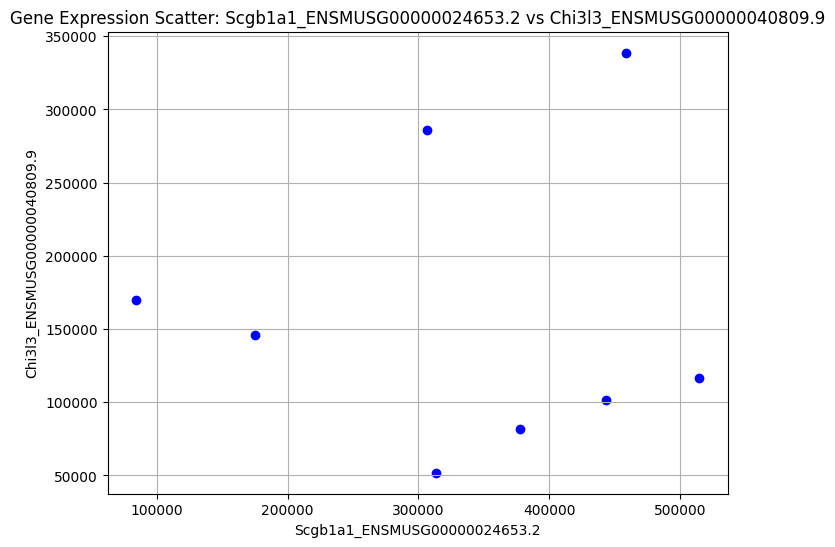

In [21]:
import matplotlib.pyplot as plt

# Compute mean expression across samples for each gene (excluding the first column)
merged_df['mean_expr'] = merged_df.iloc[:, 1:].mean(axis=1)

# Get top 2 genes
top2 = merged_df.nlargest(2, 'mean_expr')

# Extract expression values (excluding Gene ID and mean column)
x = top2.iloc[0, 1:-1]  # expression of top gene
y = top2.iloc[1, 1:-1]  # expression of 2nd top gene
gene1 = top2.iloc[0, 0]
gene2 = top2.iloc[1, 0]

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue')
plt.title(f"Gene Expression Scatter: {gene1} vs {gene2}")
plt.xlabel(gene1)
plt.ylabel(gene2)
plt.grid(True)
plt.show()
